<a href="https://colab.research.google.com/github/NikFloden/Art-Style-Transfer-Using-Neural-Networks/blob/main/Milestone_3_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objective
Use transfer learning to improve the accuracy of the CIFAR10 dataset. The purpose is to get experience using pretrained models.
##1. Load the CIFAR10 dataset, set up our model

In [1]:
from tensorflow.keras.datasets import cifar10
import numpy as np
np.random.seed(2822) #gotta make it replicatable and stay the same across runnings
# Loads the cifar10 dataset
(x_train, y_train), (x_test, y_test)  = cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


So first things first, let's look at the shape of our data:

In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


Let's take a look at a random image for fun.

[2]


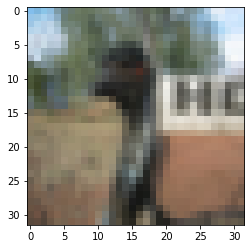

In [3]:

import matplotlib.pyplot as plt

random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num])
print(y_train[random_num])

Looking at the dataset's webpage, the list is all uint8s, we gotta change that to floats and then norm the data to make it work simpler. 

In [4]:
img_rows = x_train[0].shape[0] #we're gonna need this later, I just know it. 
img_cols = x_train[0].shape[1]

# change our image type to float32 data type
x_train = x_train.astype('float32') #uint8 originally
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255.0
x_test /= 255.0


Again on the theme of making things move smoother, let's one-hot encode the labels.

In [5]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

Alright, it's time to set up the network. 

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD 
import tensorflow as tf

input_shape = x_test[0].shape
#init the model
model = Sequential()

#First convolutional layer, using padding ='same' to maintain the output shape
model.add(Conv2D(32, 3, padding='same', input_shape=input_shape))
#first Activation layer
model.add(Activation('relu'))
#second convolutional layer
model.add(Conv2D(32, 3))
#second Activation layer
model.add(Activation('relu'))
#first pooling layer, using a kernel of 2,2
model.add(MaxPooling2D(pool_size=(2, 2)))
#dropout layer
model.add(Dropout(0.5))
#third convolutional layer, using padding agin to maintain the output shape, but increasing the filters to 64
model.add(Conv2D(64, 3, padding ='same'))
#third activation layer
model.add(Activation('relu'))
#Fourth convolutional layer, same # of filters as the third
model.add(Conv2D(64, 3))
#fourth activation layer
model.add(Activation('relu'))
#second pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
#second dropout layer
model.add(Dropout(0.5))
#flatten layer
model.add(Flatten())
#dense layer
model.add(Dense(512))
#another activation layer
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.01),
              metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                        

We got it right on the money, exactly what we want.
#2. The training montage

In [7]:
batch_size = 32
epochs = 10
from tensorflow.keras.callbacks import History

history = model.fit(x_train, y_train, batch_size, epochs, validation_data = (x_test, y_test)) #fit our model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/10
1563/1563 [==============================] - 31s 14ms/step - loss: 2.2018 - accuracy: 0.1668 - val_loss: 2.0137 - val_accuracy: 0.2719
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.9364 - accuracy: 0.2839 - val_loss: 1.7180 - val_accuracy: 0.3752
Epoch 3/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.7263 - accuracy: 0.3647 - val_loss: 1.5265 - val_accuracy: 0.4439
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.5846 - accuracy: 0.4187 - val_loss: 1.4130 - val_accuracy: 0.4869
Epoch 5/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.4869 - accuracy: 0.4575 - val_loss: 1.3839 - val_accuracy: 0.5073
Epoch 6/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.4223 - accuracy: 0.4833 - val_loss: 1.3343 - val_accuracy: 0.5142
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.3742 - accuracy: 0.5029 - val_loss: 1.2379 -

In [8]:
from tensorflow.keras.models import load_model
model.save('cfar10_deep_cnn_10_Epochs.h5')
print('model saved')
del(model)
model = load_model('cfar10_deep_cnn_10_Epochs.h5')

model saved


##3. Testing with some test images
We're gonna grab 5 and see what our model classifies it as.

8	7	7	7	1	

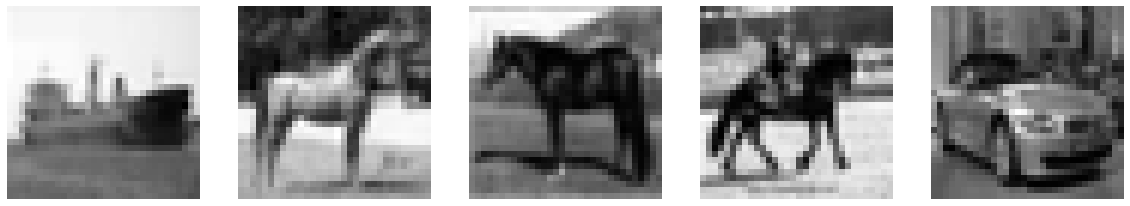

In [9]:
import numpy as np

figure = plt.figure(figsize=(20,20))


for i in range(5):
    figure.add_subplot(1,5,i+1)
    random_idx = np.random.randint(0,len(x_test))
    plt.imshow(x_test[random_idx,:,:,0],cmap="gray")
    plt.axis("off")
    print(np.squeeze(np.argmax(model.predict(x_test[random_idx].reshape(1,32,32,3)),axis=1),axis=0),end="\t")

So in a breakdown:



1.   From what I can tell, this image is of a ship and the model agrees.
2.   This is pretty obviously a horse, and the model classified it as a horse as well.
3. This appears to be a horse too and the model also classifies it as one.
4. A third horse, a third correct classification of a horse.
5. Definitely a car, classified as a car.

Well, I guess we got lucky with this sample. 100% accuracy in this sample. 



##4. Loading VGG16

In [10]:
from tensorflow.keras.applications import vgg16 as vgg
base_model = vgg.VGG16(weights='imagenet',
                      include_top=False,
                      input_shape=(32, 32, 3))

58900480/58889256 [==============================] - 1s 0us/step


Extract the last layer from the third block of the VGG16 model. You’ll be reusing the VGG model up to block3_pool.

In [11]:
base_model.summary()
last = base_model.get_layer('block3_pool').output

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

Add classification layers for the CIFAR10 classes on top of it as shown in the figure:

In [12]:
from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras import Model
x = GlobalAveragePooling2D()(last)
x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
# Make your top model
number_of_classes = 10
top = Dense(number_of_classes, activation='softmax')(x)
# Construct your full model now
model = Model(base_model.input, top)

Freeze the layers in VGG16 model.

In [13]:
for layer in base_model.layers:
    layer.trainable = False

In [14]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.01),
              metrics = ['accuracy'])
history = model.fit(x_train, y_train, batch_size, epochs, validation_data = (x_test, y_test)) #fit our model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/10
1563/1563 [==============================] - 22s 13ms/step - loss: 1.5223 - accuracy: 0.4644 - val_loss: 1.1255 - val_accuracy: 0.6063
Epoch 2/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.1677 - accuracy: 0.5913 - val_loss: 0.9897 - val_accuracy: 0.6539
Epoch 3/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.0625 - accuracy: 0.6280 - val_loss: 0.9209 - val_accuracy: 0.6757
Epoch 4/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.9974 - accuracy: 0.6513 - val_loss: 0.8788 - val_accuracy: 0.6882
Epoch 5/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.9484 - accuracy: 0.6685 - val_loss: 0.8479 - val_accuracy: 0.6996
Epoch 6/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.9172 - accuracy: 0.6798 - val_loss: 0.8288 - val_accuracy: 0.7067
Epoch 7/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.8902 - accuracy: 0.6888 - val_loss: 0.8055 -

Well, the transfer model has a significantly better accuracy. 73% vs 59%.

#3.1 Feature Map and Filter Visualization

Extracting the convolutional layers, and getting their filters and bias values. Starting with the third hidden layer.

In [15]:
filters, biases = model.layers[2].get_weights()
print(filters.shape, biases)
print(biases.shape)

(3, 3, 64, 64) [-0.30912212  0.36397225  0.13737613  0.07717966  0.9052184   0.08885256
  0.10789118 -0.23106739 -0.6318097   0.18161367 -0.33391494  0.1961724
  0.43838617  0.1938708   0.10894354  0.10315038 -1.0271513   0.05252688
  0.13118458  0.22851577 -0.71377224  0.2154155  -0.6981962   0.04061132
  0.13955347  0.28767544  0.35358745  0.3937295   0.43452853 -0.48259264
  0.02631121  0.09220165  0.05196398  0.550705    0.32368094  0.07263482
 -0.17745508  0.3761972   0.39344102  0.17673127 -0.15784228  0.26051855
  0.08342359  0.08603705 -0.09131282  0.22932515  0.2998315   0.13511261
 -0.3835829   0.10912544 -0.53432876  0.4741787  -0.0740848   0.30046257
  0.12590808  0.16480374  0.2403943   0.23401979 -0.19334187  0.01663565
  0.27144948  0.03385786  0.06076292 -0.5825159 ]
(64,)


So we can see that the biases are lists of size 64, all with values between -1 and 1, and the filters are tensors of size (3, 3, 64, 64)
###Plotting the first 6 convolution filters


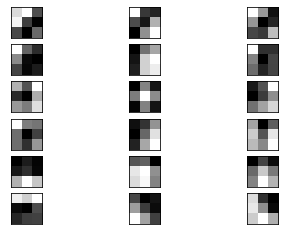

In [25]:
#First thing we want to do is to normalize the filter values
f_min, f_max = filters.min(), filters.max() #normalize the  filter values to 0-1
filters = (filters - f_min) / (f_max - f_min)
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = plt.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(f[:, :, j], cmap='gray')
		ix += 1

###Running an input image
This is our image: 
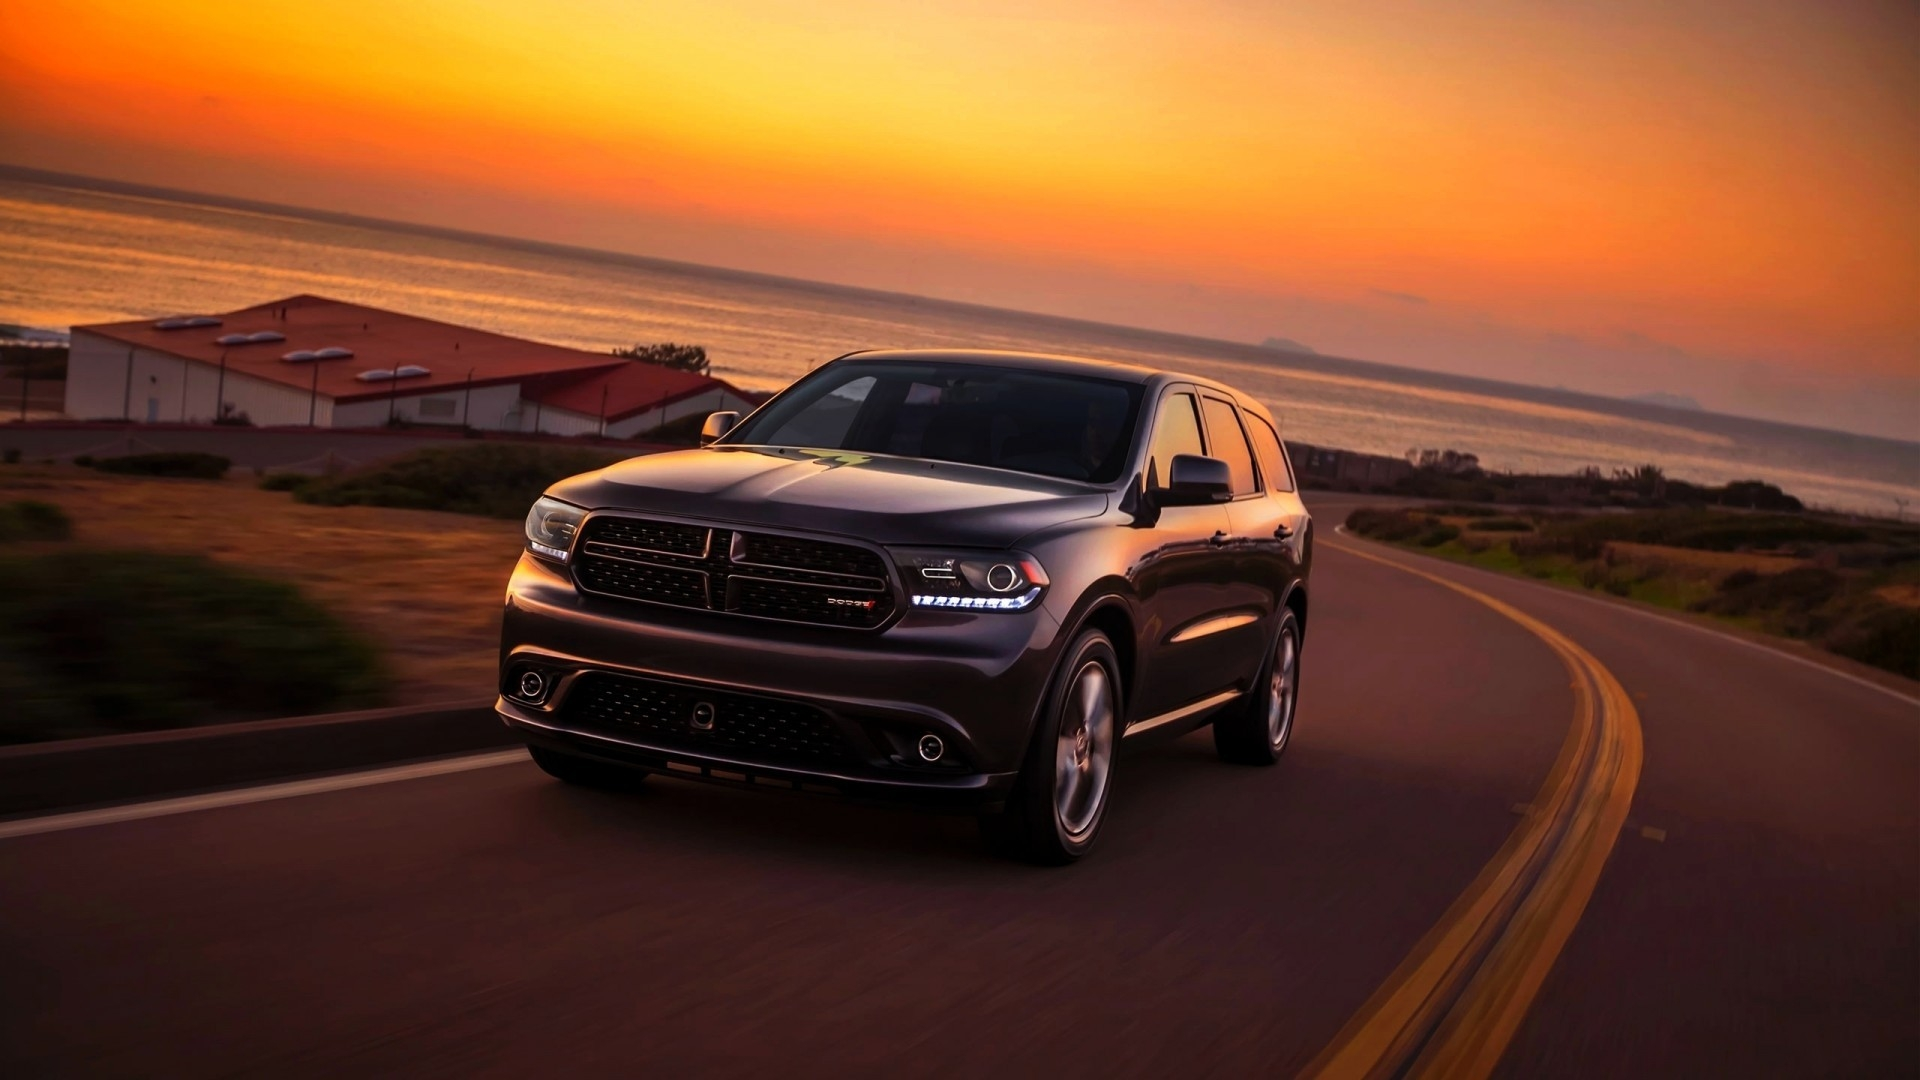

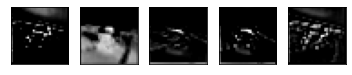

In [45]:
from tensorflow.keras.utils import load_img, img_to_array
from numpy import expand_dims
from tensorflow.keras.applications.vgg16 import preprocess_input
model = Model(inputs=model.input, outputs=model.layers[1].output) #redefine the model to output right after the first hidden layer
img = load_img('car.jpg', target_size=(32,32)) #load our car image as a 32x32 img
img = img_to_array(img) #convert the image to an array so our model can work on it
img = expand_dims(img, axis = 0) #expand the dimensions so that it represents a single sample

img = preprocess_input(img) #gotta preprocess the image before we feed it to the model.

feature_maps = model.predict(img)
ix = 1
indexes = [2, 5, 9, 13, 17]
for i in indexes:
    ax = plt.subplot(1,5,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(feature_maps[0, :, :, i], cmap='gray')
    ix += 1
plt.show()